In [32]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [4]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30
Looking in ind

In [33]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

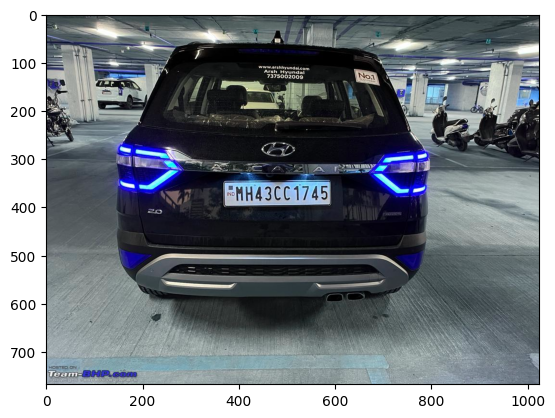

In [34]:
plt.imshow(img)

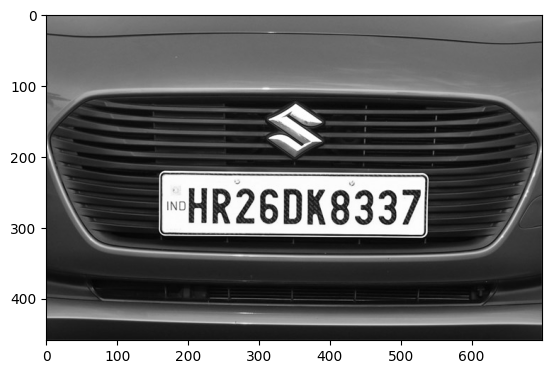

In [57]:
img =cv2.imread("/content/20180402113123_NumberPlate_Swift.jpg")
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

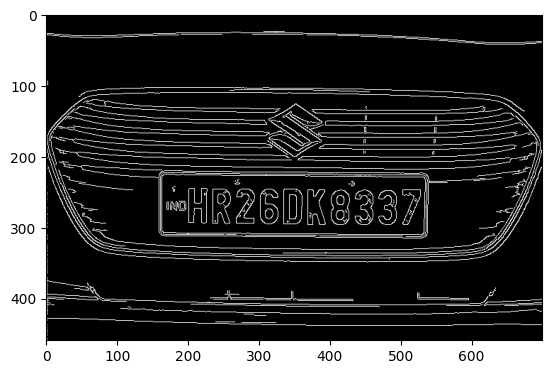

In [58]:
Filter =cv2.bilateralFilter(gray ,11 ,17,17)  #noise reduction
edges =cv2.Canny(Filter , 30,200) #Edge Ditction
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))


In [59]:
keypoint = cv2.findContours(edges.copy() , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoint)
countors =sorted(contours ,key=cv2.contourArea , reverse=True)[:11]

In [60]:
location =None
for contour in contours:
  approx =cv2.approxPolyDP(contour ,10,True)
  if len(approx) == 4:
    location = approx
    break


In [61]:
location

array([[[  0, 455]],

       [[  1, 428]],

       [[699, 437]],

       [[  0, 428]]], dtype=int32)

In [62]:
mask =np.zeros(gray.shape , np.uint8)
new_image=cv2.drawContours(mask ,[location],0,255,-1)
new_image=cv2.bitwise_and(img , img ,mask=mask)

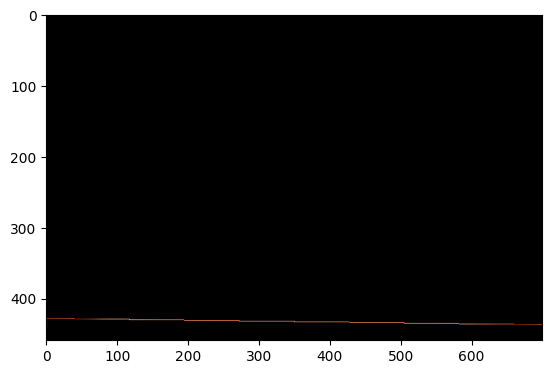

In [63]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [52]:
(x,y) =np.where(mask==255)
(x1,y1) =(np.min(x) , np.min(y))
(x2,y2) =(np.max(x) , np.max(y))
croped_img =gray[x1:x2+1 , y1:y2+1]

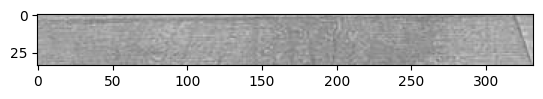

In [53]:
plt.imshow(cv2.cvtColor(croped_img,cv2.COLOR_BGR2RGB))

In [54]:
reader = easyocr.Reader(["en"])
result =reader.readtext(croped_img)
result

[]

In [56]:
text =result[0][-5]
font =cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text , org=(approx[0][0][0] , approx[1][0][1]+60) , fontFace=font, fontScale=1, color=(0,255,0), thickness =2 ,lineType=cv2.LINE_AA)
res = cv2.rectangle(img , tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res , cv2.COLOR_BGR2RGB))


IndexError: ignored